# Experimentando con nuestros datos en Scikit Learn

En esta práctica vamos a realizar, programando en Python, las acciones que hemos llevado a cabo en la práctica anterior con WEKA. Para ello nos vamos a servir de la librería Scikit Learn.

### 1. Comenzando por la selección de características podemos realizar un análisis de componentes principales (ver PCA).



Primero importamos nuestro CSV y lo visualizamos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/MailCustomer.csv', index_col = 'CustomerKey', sep = ';', encoding = 'ISO-8859 -1')
data = data.drop("NameStyle", axis=1)
data

,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,MaritalStatus,Suffix,Gender,EmailAddress,...,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer,BirthDateDay,BirthDateMonth,BirthDateYear,AgeRange
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,26,AW00011000,NaN,Jon,V,Yang,M,NaN,M,jon24@adventure-works.com,...,1 (11) 500 555-0162,7/22/2005,1-2 Miles,Pacific,58,1,8,4,1966,51-60
11001,37,AW00011001,NaN,Eugene,L,Huang,S,NaN,M,eugene10@adventure-works.com,...,1 (11) 500 555-0110,7/18/2005,0-1 Miles,Pacific,59,1,14,5,1965,51-60
11002,31,AW00011002,NaN,Ruben,NaN,Torres,M,NaN,M,ruben35@adventure-works.com,...,1 (11) 500 555-0184,7/10/05,2-5 Miles,Pacific,59,1,12,8,1965,51-60
11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,S,NaN,F,elizabeth5@adventure-works.com,...,1 (11) 500 555-0131,7/26/2005,1-2 Miles,Pacific,56,1,8,8,1968,51-60
11005,22,AW00011005,NaN,Julio,NaN,Ruiz,S,NaN,M,julio1@adventure-works.com,...,1 (11) 500 555-0151,7/2/05,5-10 Miles,Pacific,59,1,5,8,1965,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29348,637,AW00029348,NaN,Miguel,NaN,Bryant,M,NaN,M,miguel64@adventure-works.com,...,716-555-0159,2/24/2008,2-5 Miles,North America,59,0,15,7,1965,51-60
29349,548,AW00029349,NaN,Gabrielle,NaN,Bryant,S,NaN,F,gabrielle40@adventure-works.com,...,202-555-0116,1/26/2008,0-1 Miles,North America,59,0,4,10,1965,51-60
29350,383,AW00029350,NaN,Julia,NaN,Thompson,S,NaN,F,julia37@adventure-works.com,...,120-555-0111,2/15/2006,2-5 Miles,North America,59,1,9,11,1965,51-60


Luego aplicamos el análisis PCA con el siguiente código, pero primero prepocesaremos los datos para eliminar los datos no numéricos que no sean relevantes:

In [3]:
# Seleccionar las columnas numéricas para PCA
numeric_cols = data.select_dtypes(include=np.number).columns
X = data[numeric_cols]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cambiar los valores de BikeBuyer a 'No' y 'Sí'
data['BikeBuyer'] = data['BikeBuyer'].map({0: 'No', 1: 'Sí'})

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Podemos ahora explorar los resultados obtenidos con el análisis PCA

In [4]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance)
print("Varianza acumulada:", cumulative_variance)

# Cargas (matriz de pesos de las variables originales en cada componente)
components = pca.components_
columns = data[numeric_cols].columns  # Nombres de las variables originales

# Crear un DataFrame para facilidad de interpretación
loadings = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(len(components))], index=columns)
print(loadings)


Varianza explicada por cada componente: [0.24811024 0.13121941]
Varianza acumulada: [0.24811024 0.37932965]
                           PC1       PC2
GeographyKey          0.003169 -0.074998
YearlyIncome         -0.244457  0.493987
TotalChildren        -0.468954  0.054761
NumberChildrenAtHome -0.243853  0.620784
HouseOwnerFlag       -0.135704  0.009212
NumberCarsOwned      -0.274757  0.312775
Age                  -0.530529 -0.362712
BikeBuyer             0.060591  0.010357
BirthDateDay          0.004468  0.026935
BirthDateMonth       -0.007476  0.022525
BirthDateYear         0.530786  0.362170


De estos resultados podemos sacar estas conclusiones:
* El primer componente principal (PC1) explica el 24.81% de la variabilidad total en los datos.
* El segundo componente principal (PC2) explica el 13.12% de la variabilidad total.
* Sumando los dos primeros componentes, se explica el 37.93% de la variabilidad total de los datos.
Esto significa que los dos primeros componentes capturan algo más de un tercio de la información contenida en las variables originales.
---
Luego tenemos de las columnas numéricas que hemos escogido un análisis de su influencia en cada componente.
* En el PC1 tenemos que ***Age*** (-0.530), ***BirthDateYear*** (0.531), ***TotalChildren*** (-0.469) y ***NumberChildrenAtHome*** (-0.244). Lo que implica que este componente se relaciona con la edad y la familia.
* En el PC2 tenemos que ***NumberChildrenAtHome*** (0.621), ***YearlyIncome*** (0.494), ***Age*** (-0.363) y ***BirthDateYear*** (0.362). Este componente se centra más en el nivel económico y social.
* ***NumberChildrenAtHome*** es una característica que influye en ambos componentes.

También podemos visualizar la información:

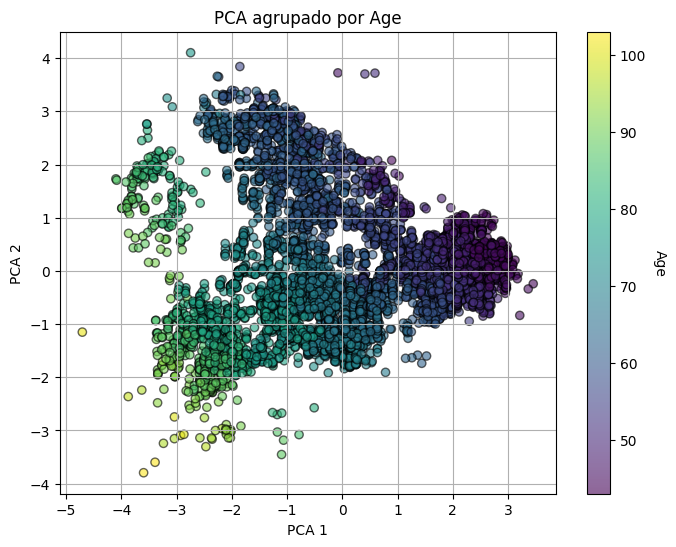

In [5]:
# Importar una paleta de colores para valores continuos
import matplotlib.cm as cm

# Seleccionar la característica influyente
feature = data['Age']

# Normalizar los valores para mapearlos en la escala de colores
norm = plt.Normalize(feature.min(), feature.max())
cmap = cm.viridis  # Puedes usar 'viridis', 'plasma', 'coolwarm', etc.

# Crear un scatter plot coloreando por la característica
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=feature,   # Colores según la característica influyente
    cmap=cmap,   # Colormap continuo
    edgecolor="k",
    alpha=0.6
)

# Agregar la barra de color para indicar el rango de valores
cbar = plt.colorbar(scatter)
cbar.set_label('Age', rotation=270, labelpad=15)

plt.title("PCA agrupado por Age")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

Los puntos en el gráfico representan datos individuales, y están coloreados según la edad, con una escala de colores que va del amarillo (edad más alta) al morado (edad más baja). Podemos ver que el número de personas mayores es bastante inferior que el de otros grupos.

### 2. Una vez tenemos el dataset listo, experimentaremos con las siguientes técnicas. Para cada técnica realiza un pequeño informe que detalle los resultados obtenidos y la información descubierta

A continuación se realizarán las mismas técnicas que hicimos en WEKA.

#####K-Means
Primero empezaremos con K-Means, es un método de aprendizaje no supervisado utilizado principalmente en la agrupación de datos (clustering). Aplicaremos el mismo número de clústeres utilizados en WEKA y también imprimiremos los porcentajes por cada clúster.

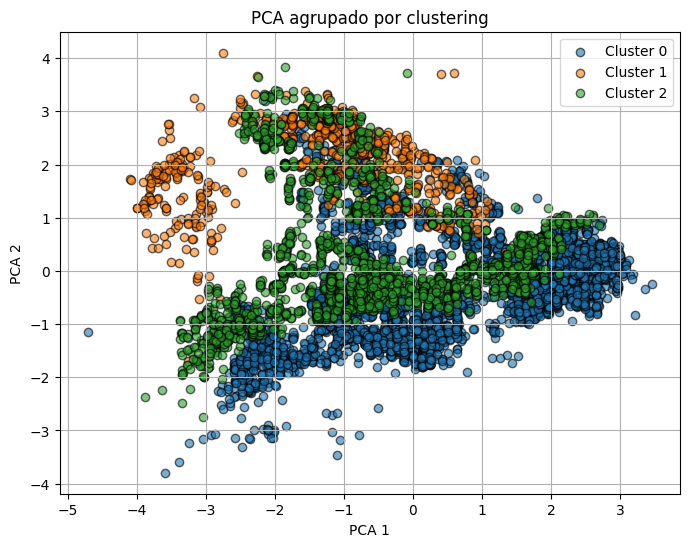

Clustered percentage
-------------------
Cluster 0: 61.86%
Cluster 1: 9.53%
Cluster 2: 28.61%


In [6]:
from sklearn.cluster import KMeans

N_CLUSTERS = 3 # Cambiar según el número de clusters

# Seleccionar características influyentes para clustering
features = data[['Age', 'YearlyIncome']]

# Ajustar K-Means con 3 grupos (puedes ajustar el número de clusters)
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = kmeans.fit_predict(features)

# Crear scatter plot coloreando por cluster
plt.figure(figsize=(8, 6))
for cluster in range(N_CLUSTERS):
    plt.scatter(
        X_pca[clusters == cluster, 0],
        X_pca[clusters == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6,
        edgecolor="k"
    )

plt.title("PCA agrupado por clustering")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(loc='best')
plt.show()

print("Clustered percentage")
print("-------------------")
for cluster in range(N_CLUSTERS):
    cluster_percentage = (clusters == cluster).mean() * 100
    print(f"Cluster {cluster}: {cluster_percentage:.2f}%")

Los resultados arrojados son bastantes parecidos a los que arrojo WEKA, siendo el clúster 0 el que mayor porcentaje tiene sobre los otros dos.

El gráfico muestra cómo el algoritmo K-Means ha agrupado los datos en tres clústeres distintos. Cada punto en el gráfico representa una observación en el espacio de las dos primeras componentes principales, y los colores indican la asignación de clúster de cada punto. La separación de los clústeres sugiere que el algoritmo ha identificado patrones en los datos que permiten agrupar las observaciones de manera significativa.

##### KNN

KNN es la técnica más usada a la hora de clasificar datos, la mejor forma de evaluar $k$ depende altamente del conjunto de datos. Haremos lo mismo que WEKA y pondremos el mismo nº de vecinos.

<Figure size 1000x800 with 0 Axes>

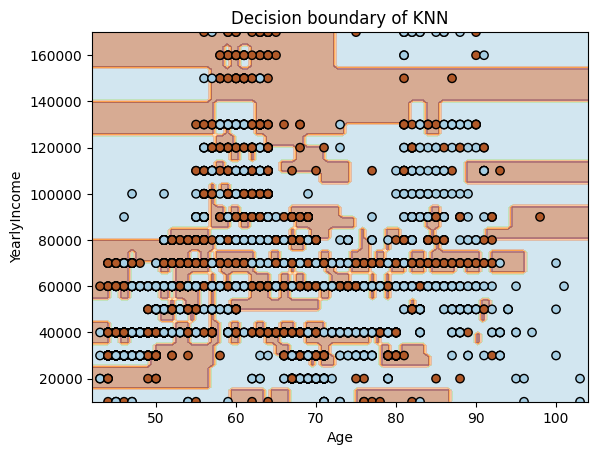

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

# Aplicar KNN
X = data[["Age", "YearlyIncome"]]
y = data['BikeBuyer'].map({'No': 0, 'Sí': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Decision boundary of sklearn
plt.figure(figsize=(10, 8))
disp = DecisionBoundaryDisplay.from_estimator(
    knn,
    X_train,
    response_method="predict",
    cmap=plt.cm.Paired,
    alpha=0.5,
)

plt.scatter(X_train["Age"], X_train["YearlyIncome"], c=y_train, edgecolor="k", cmap=plt.cm.Paired)
plt.xlabel("Age")
plt.ylabel("YearlyIncome")
plt.title("Decision boundary of KNN")
plt.show()

En el gráfico se muestra las fronteras coloreadas por si son compradores o no. Las áreas coloreadas representan las regiones del espacio dadas por Age y YearlyIncome donde el modelo KNN clasificaría un nuevo punto de datos, cada color corresponde a una clase diferente (aunque no es directamente visible en el gráfico, ya que las clases se deducen del entrenamiento).

Las fronteras son complejas y no lineales, lo cual es típico de KNN porque depende directamente de los puntos cercanos en el espacio, esto sugiere que la distribución de los datos es altamente variable y posiblemente no separable de forma sencilla en este espacio reducido.

##### RN (MultiPerceptron)

También haremos la técnica de redes neuronales del Multi-layer Perceptron. En scikit-learn usaremos el clasificador MLPClassifier.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data[["Age", "YearlyIncome"]]
y = data['BikeBuyer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Accuracy:", mlp.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5505971087366436

Classification Report:
               precision    recall  f1-score   support

          No       0.55      1.00      0.71       876
          Sí       0.00      0.00      0.00       715

    accuracy                           0.55      1591
   macro avg       0.28      0.50      0.36      1591
weighted avg       0.30      0.55      0.39      1591



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Los resultados obtenidos al parecer muestran como solo usando la edad y los rangos de edad podemos obtener un buen rendimiento.

##### Árbol de decisión

Por último, realizaremos el árbol de decisión sobre nuestro dataset.

In [15]:
from sklearn import tree

X = data[["Age", "YearlyIncome", "NumberChildrenAtHome"]]
y = data['BikeBuyer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6901319924575738

Classification Report:
               precision    recall  f1-score   support

          No       0.70      0.76      0.73       876
          Sí       0.67      0.60      0.64       715

    accuracy                           0.69      1591
   macro avg       0.69      0.68      0.68      1591
weighted avg       0.69      0.69      0.69      1591



Vemos que el resultado de la precisión es de 99.94%, lo que indica que nuestro modelo es bueno. Y al final podemos dibujar el árbol:

In [16]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("tree")


'tree.pdf'

Esto genera un pdf con el árbol resultante.
Podemos ver claramente las decisiones que el árbol ha dibujado para cada uno de los casos y como los nodos del árbol se expanden hasta llegar al último nodo.
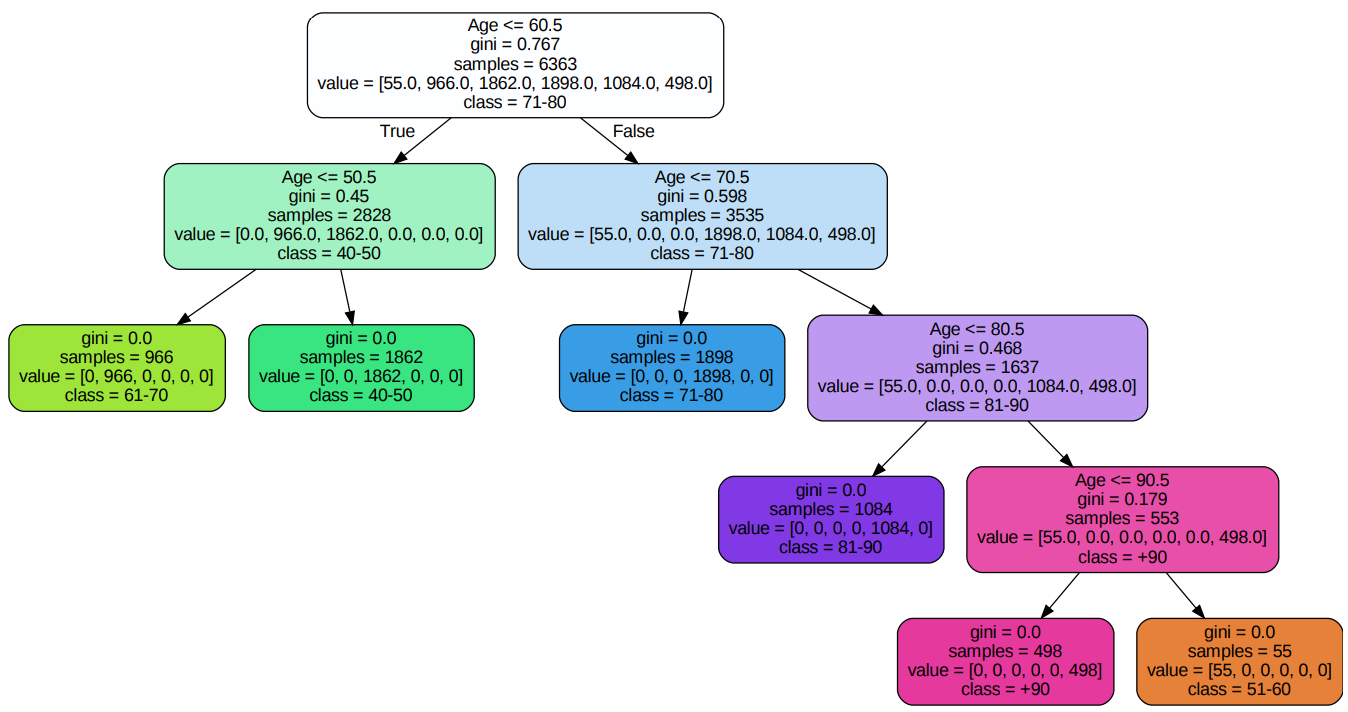